In [30]:
#Sources 

# https://en.wikipedia.org/wiki/Rotation_matrix
# https://docs.opencv.org/3.4/d4/d94/tutorial_camera_calibration.html
# 


import numpy as np
import math as m
import matplotlib.pyplot as plt
import os

np.set_printoptions(suppress=True,
                    formatter={'float_kind': '{:f},'.format})

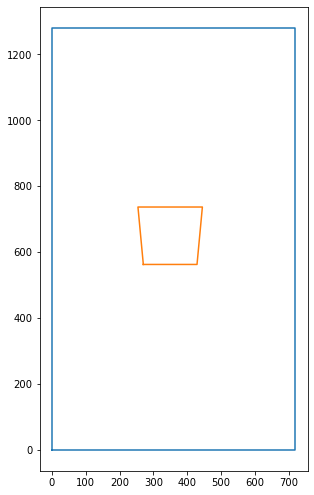

[270.422555, 562.348305,]
[429.176176, 562.348305,]
[445.051538, 736.661451,]
[254.547193, 736.661451,]
[270.422555, 562.348305,]




In [31]:
image_info =  np.loadtxt(fname= os.getcwd() +  '/storage/image_info.txt', delimiter=',')
w = image_info[0]
h = image_info[1]

image_points = [
    np.array([0, 0]),
    np.array([w, 0]),
    np.array([w, h]),
    np.array([0, h]),
    np.array([0, 0]),
]


opencv_mtx = np.loadtxt(fname= os.getcwd() + '/storage/opencv_matrix.txt', delimiter=',')

xpos = 0.0
ypos = 0.0

xrot = 45    #degrees
yrot = 0    #degrees

xrad = xrot * m.pi/180
yrad = yrot * m.pi/180

cx = 0.2/m.cos(xrad)
cy = 0.2/m.cos(yrad)

ax = m.sqrt(m.pow(cx,2)-m.pow(0.2,2))
ay = m.sqrt(m.pow(cy,2)-m.pow(0.2,2))

if(xrot < 0):
    ax = -ax

if(yrot < 0):
    ay = -ay

world_points = [
    [
        np.array([-0.1 + xpos, -0.1 + ypos, 1.0 + ax]),  #bottom left
        np.array([0.1 + xpos, -0.1 + ypos, 1.0 + ax]),   #bottom right
        np.array([0.1 + xpos, 0.1 + ypos, 1.0]),    #top right 
        np.array([-0.1 + xpos, 0.1 + ypos, 1.0])    #top left
    ],
]

screen_points = []

for set in world_points:
    point_set = []
    for p in set:
        screen_point = opencv_mtx.dot(p)/p[2]
        point_set.append(np.array([screen_point[0], screen_point[1]]))
    point_set.append(point_set[0])
    screen_points.append(point_set)
   
# print('opencv_mtx= ', opencv_mtx, '\n')
# print(screen_points)

xs, ys = zip(*image_points) #create lists of x and y values


scale = 150

plt.figure(figsize=(w/scale,h/scale))
plt.plot(xs,ys)

for set in screen_points:
    xs1, ys1 = zip(*set)
    plt.plot(xs1,ys1)  

plt.show() # if you need...

for set in screen_points:
    for p in set:
        print(p)
    print('\n')